In [ ]:
!pip install geopandas
!pip install geojson
!pip install contextily
!pip install jupyter-dash

     |████████████████████████████████| 972kB 3.4MB/s 
     |████████████████████████████████| 6.5MB 19.5MB/s 
     |████████████████████████████████| 14.8MB 195kB/s 
     |████████████████████████████████| 18.3MB 1.2MB/s 
     |████████████████████████████████| 51kB 2.0MB/s 
     |████████████████████████████████| 81kB 5.3MB/s 
     |████████████████████████████████| 1.0MB 17.5MB/s 
     |████████████████████████████████| 3.5MB 25.4MB/s 
     |████████████████████████████████| 194kB 46.8MB/s 
     |████████████████████████████████| 1.8MB 46.5MB/s 
     |████████████████████████████████| 358kB 53.7MB/s 
  Created wheel for ansi2html: filename=ansi2html-1.5.2-cp36-none-any.whl size=13862 sha256=81de387b03ad4f4367c228577c9adffc4abc395cb8e29fc0840cf37d747eaa57
  Stored in directory: /root/.cache/pip/wheels/f9/ea/e0/1ed3c3945ce073f930f3e5aa2b9bbadb03cd2efc8f8695cd61
  Created wheel for dash: filename=dash-1.17.0-cp36-none-any.whl size=83728 sha256=a57ac72e6fdc5d0963bfee49d01c8ac27f054ab486

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

from datetime import datetime


import matplotlib.pyplot as plt
import seaborn as sns
#import datetime as dt

In [ ]:
## Data from holidays 
df_festivos =pd.read_csv("/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data_Final/Pico_placa/Tipodia_HF.csv", sep=";", encoding='latin-1')


### Data August - September period without Pico y Placa (df)

df1= pd.read_csv('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data_Final/Pico_placa/pico_placa_ago_sep_HF.csv',sep=";", encoding='latin-1',
               )


df2= pd.read_csv('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data_Final/Pico_placa/pico_placa_oct_HF.csv',sep=";", encoding='latin-1',
               )


df1["Fecha"] = pd.to_datetime(df1["Fecha"], format = "%Y/%m/%d") #, format = "%d/%m/%Y"
df1["Fecha_dm"] = df1["Fecha"].dt.strftime("%d/%m")


df2["Fecha"] = pd.to_datetime(df2["Fecha"], format = "%Y/%m/%d") #, format = "%d/%m/%Y"
df2["Fecha_dm"] = df2["Fecha"].dt.strftime("%d/%m")


df_festivos["Fecha"] = pd.to_datetime(df_festivos["Fecha"]) #, format = "%d/%m/%Y"



df = pd.concat([df1,df2])
df = df.merge(df_festivos, how="left",left_on="Fecha", right_on="Fecha")


df= df[df["Tipodia"]=="Habil"] # Se dejan solo los dias habiles
# #df2 = df2.loc[df2["Fecha"] < '2020-09-22'] # Se filtra el periodo de NPP

df["Medida"] = "pico_y_placa"
df.loc[df['Fecha'] < '2020-09-22', 'Medida'] = "no_pico_y_placa"


df_SPP = df.loc[df["Fecha"] <= '2020-09-21'] # Se filtra el periodo de NPP
df_PP = df.loc[df["Fecha"] >= '2020-09-22'] # Se filtra el periodo de NPP
print(df_SPP.shape)
print(df_PP.shape)
print(df.shape)

df.head()

(22520, 12)
(18988, 12)
(41508, 12)


,Jornada,Corredor,tid,Tramo,Sentido,Volumen,Fecha,Velocidad,Fecha_dm,Nombredia,Tipodia,Medida
0,PM,Autopista Norte,1002018,AUTONORTE - ALCALACL146,SN,325,2020-08-03,43.878331,03/08,Lunes,Habil,no_pico_y_placa
1,AM,Autopista Norte,1002018,AUTONORTE - ALCALACL146,SN,168,2020-08-03,47.911996,03/08,Lunes,Habil,no_pico_y_placa
2,PM,Autopista Norte,1002017,AUTONORTE - ALCALAPRADO,NS,264,2020-08-03,47.506835,03/08,Lunes,Habil,no_pico_y_placa
3,AM,Autopista Norte,1002017,AUTONORTE - ALCALAPRADO,NS,202,2020-08-03,52.084691,03/08,Lunes,Habil,no_pico_y_placa
4,PM,Autopista Norte,1002021,AUTONORTE - CARDIO.INFANTILCL146,NS,253,2020-08-03,50.053515,03/08,Lunes,Habil,no_pico_y_placa


In [ ]:
#print(df.groupby("Fecha").size())
# print(max(df_SPP.Fecha))
# print(min(df_PP.Fecha))
print(df[df["Fecha"]=="2020-09-19"].Velocidad)

Series([], Name: Velocidad, dtype: float64)


In [ ]:
print(df_SPP[["Volumen","Velocidad"]].describe())
print(df_PP[["Volumen","Velocidad"]].describe())

            Volumen     Velocidad
count  22520.000000  22520.000000
mean     130.432282     29.026480
std      108.821080     10.634234
min        3.000000      3.914653
25%       58.000000     20.974665
50%      100.000000     27.648627
75%      166.000000     36.288297
max     1119.000000     69.692020
            Volumen     Velocidad
count  18988.000000  18988.000000
mean     127.480093     29.161246
std      107.331419     10.328537
min        3.000000      6.867326
25%       56.000000     21.542270
50%       98.000000     27.875445
75%      162.000000     36.001101
max     1110.000000     68.501430


No handles with labels found to put in legend.


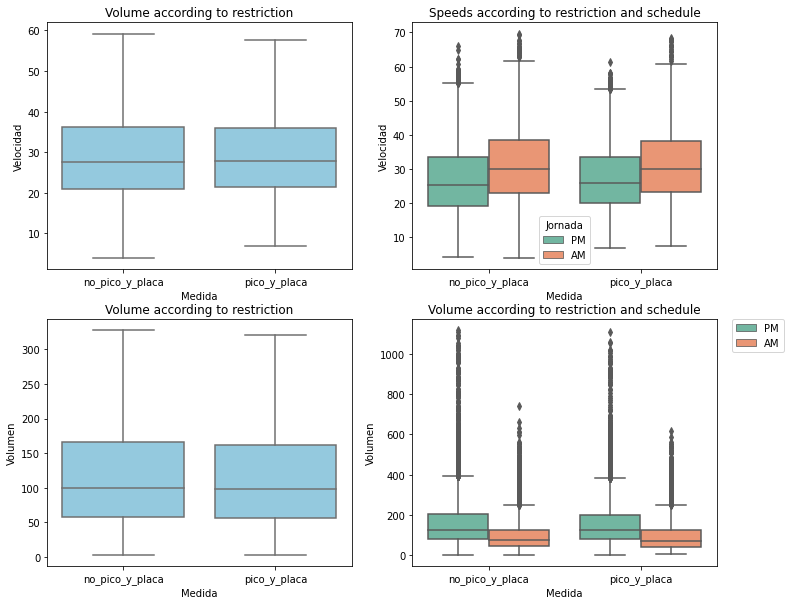

In [ ]:
fig, ax=plt.subplots(2,2, figsize=(12,10))
sns.boxplot(x="Medida",y='Velocidad',data = df, showfliers=False,  color="Skyblue", ax=ax[0,0]).set_title("Volume according to restriction") 

sns.boxplot(x="Medida", y="Velocidad", hue="Jornada", data=df,ax=ax[0,1],palette="Set2").set(title='Speeds according to restriction and schedule')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)


sns.boxplot(x="Medida",y='Volumen',data = df, showfliers=False,  color="Skyblue", ax=ax[1,0]).set_title("Volume according to restriction") 

sns.boxplot(x="Medida", y="Volumen", hue="Jornada", data=df,ax=ax[1,1],palette="Set2").set(title='Volume according to restriction and schedule')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)






No handles with labels found to put in legend.


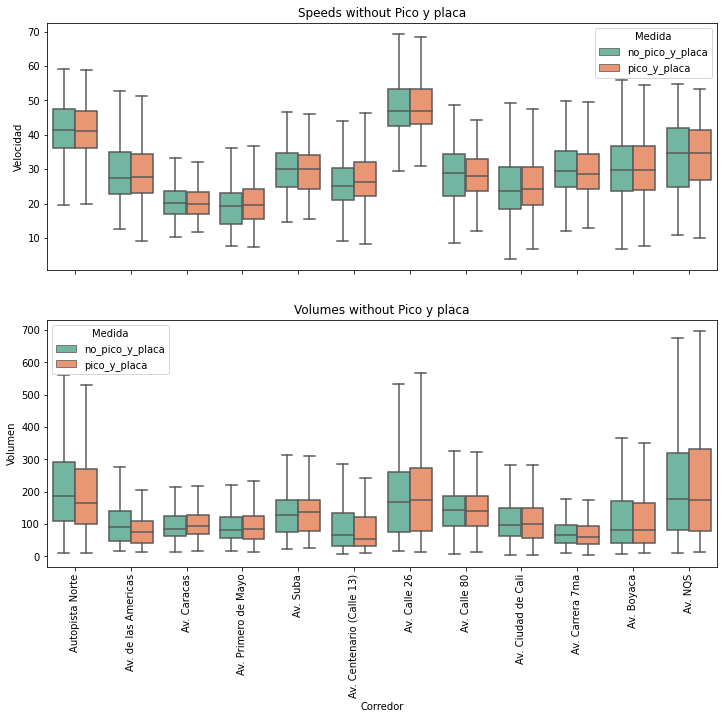

In [ ]:
fig, ax=plt.subplots(2,1, figsize=(12,10))

g1 = sns.boxplot(y='Velocidad',  x="Corredor",data = df, showfliers=False,hue="Medida",palette="Set2", 
                 color="Skyblue", ax=ax[0])#.set(title="Speeds without Pico y placa",xlabel=None)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
g1.set_xticklabels(g1.get_xticklabels(), rotation = 45)
g1.set(title="Speeds without Pico y placa",xlabel=None,xticklabels=[])

g2 = sns.boxplot(y='Volumen',  x="Corredor", data = df, showfliers=False,hue="Medida",palette="Set2", color="Skyblue", ax=ax[1])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
g2.set(title="Volumes without Pico y placa")

g2.set_xticklabels(g2.get_xticklabels(), rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


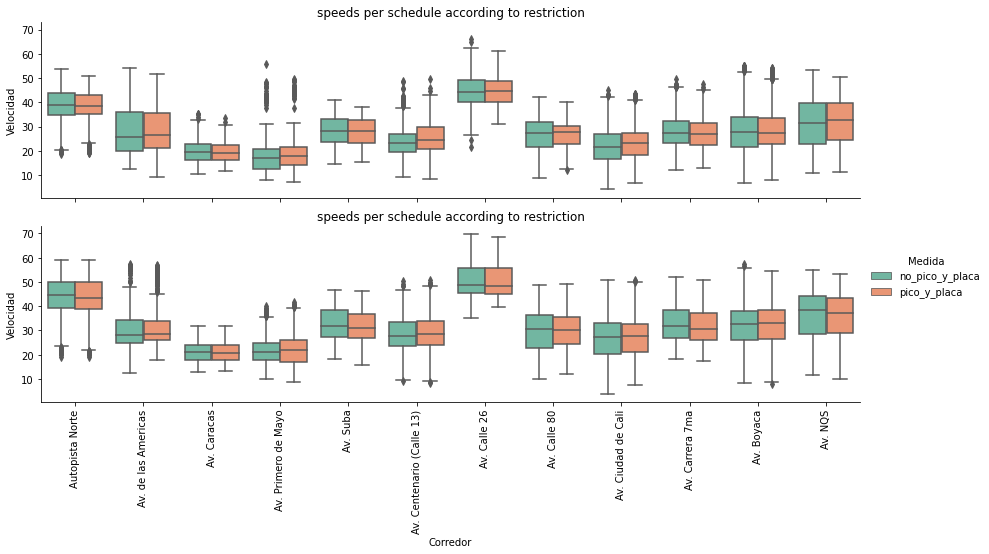

In [ ]:
g = sns.catplot(x = "Corredor", y = "Velocidad", data = df, kind = "box", col = "Jornada",
            hue="Medida",palette="Set2" ,col_wrap = 1,aspect=4,size = 3, legend_out=True )



g.set_xticklabels(rotation = 90)
g.set(title="speeds per schedule according to restriction")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


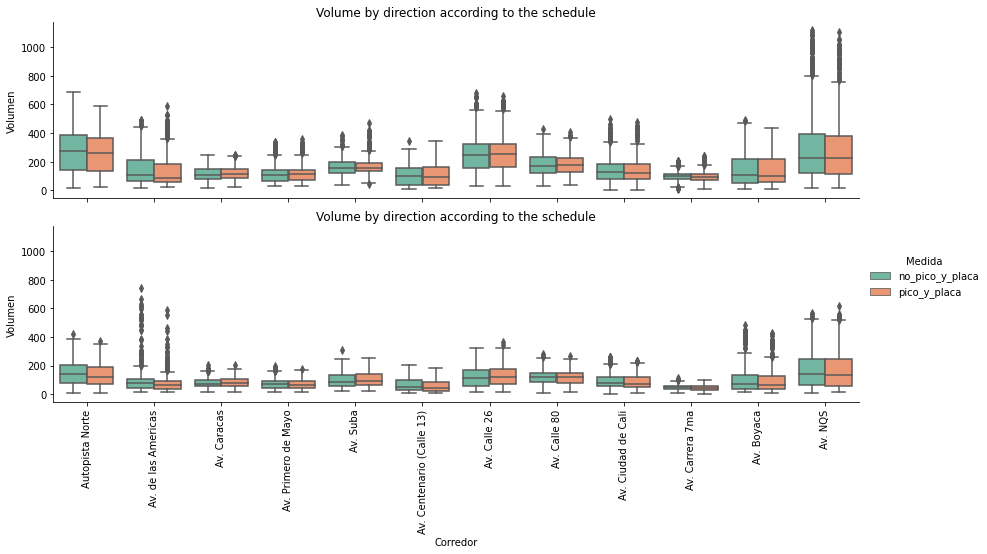

In [ ]:
g = sns.catplot(x = "Corredor", y = "Volumen", data = df, kind = "box", col = "Jornada",
            hue="Medida",palette="Set2" ,col_wrap = 1,aspect=4,size = 3, legend_out=True )
g.set_xticklabels(rotation = 90)

g.set(title="Volume by direction according to the schedule")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


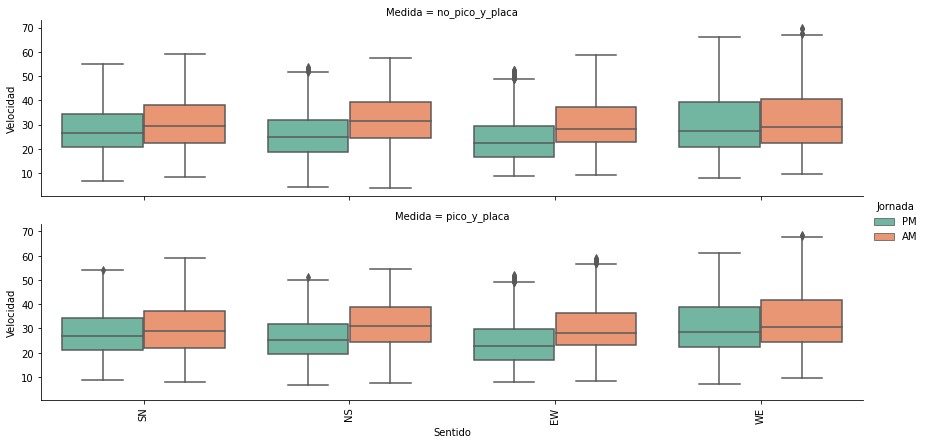

In [ ]:
g1 = sns.catplot(x = "Sentido", y = "Velocidad", data = df, kind = "box", col = "Medida",
            hue="Jornada",palette="Set2" ,col_wrap = 1,aspect=4,size = 3, legend_out=True )
g1.set_xticklabels(rotation = 90)

g.set(title="speeds by restriction according to the shedule")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


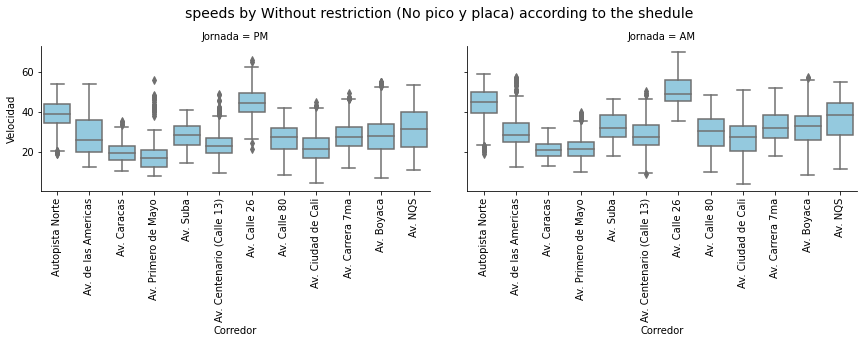

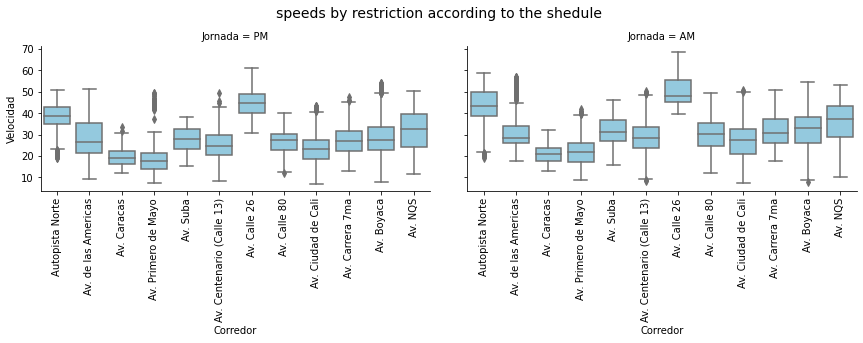

In [ ]:

g1 = sns.catplot(x = "Corredor", y = "Velocidad", data = df_SPP, kind = "box", col = "Jornada",
         color="skyblue" ,col_wrap = 2,aspect=2,size = 3, legend_out=True )
#g1.set(title="speeds by restriction according to the shedule")
g1.set_xticklabels(rotation = 90)

plt.subplots_adjust(top=0.8)
g1.fig.suptitle('speeds by Without restriction (No pico y placa) according to the shedule',fontsize=14)

g2 = sns.catplot(x = "Corredor", y = "Velocidad", data = df_PP, kind = "box", col = "Jornada",
         color="skyblue" ,col_wrap = 2,aspect=2,size = 3, legend_out=True )
#g2.set(title="speeds by restriction according to the shedule")
plt.subplots_adjust(top=0.8)
g2.fig.suptitle('speeds by restriction according to the shedule', fontsize=14)

g2.set_xticklabels(rotation = 90)



In [ ]:
# fig, ax=plt.subplots(figsize=(16,4))
# g = sns.lineplot(x="Fecha_dm", y="Velocidad", data=df,ci=None, hue="Medida", markers=True)
# g.set_xticklabels(df.Fecha_dm.unique(), rotation=90)

[Text(0, 0, '22/09'),
 Text(0, 0, '23/09'),
 Text(0, 0, '24/09'),
 Text(0, 0, '25/09'),
 Text(0, 0, '28/09'),
 Text(0, 0, '29/09'),
 Text(0, 0, '30/09'),
 Text(0, 0, '01/10'),
 Text(0, 0, '02/10'),
 Text(0, 0, '05/10'),
 Text(0, 0, '06/10'),
 Text(0, 0, '07/10'),
 Text(0, 0, '08/10'),
 Text(0, 0, '09/10'),
 Text(0, 0, '13/10'),
 Text(0, 0, '14/10'),
 Text(0, 0, '15/10'),
 Text(0, 0, '16/10'),
 Text(0, 0, '19/10'),
 Text(0, 0, '20/10'),
 Text(0, 0, '21/10'),
 Text(0, 0, '22/10'),
 Text(0, 0, '23/10'),
 Text(0, 0, '26/10'),
 Text(0, 0, '27/10'),
 Text(0, 0, '28/10'),
 Text(0, 0, '29/10'),
 Text(0, 0, '30/10')]

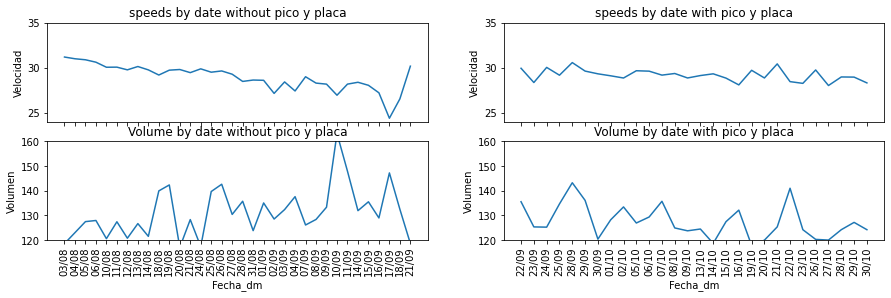

In [ ]:
fig, ax=plt.subplots(2,2,figsize=(15,4))
g1=sns.lineplot(x="Fecha_dm", y="Velocidad", data=df_SPP,ci=None, hue="Medida", markers=True, ax=ax[0,0])

g2 = sns.lineplot(x="Fecha_dm", y="Velocidad", data=df_PP,ci=None, hue="Medida", markers=True, ax=ax[0,1])

g1.get_legend().remove()
g2.get_legend().remove()

g1.set(title="speeds by date without pico y placa", ylim=(24,35),xlabel=None, xticklabels=[])
#g1.set_xticklabels(df_SPP.Fecha_dm.unique(), rotation=90)

g2.set(title="speeds by date with pico y placa", ylim=(24,35), xlabel=None, xticklabels=[])
#g2.set_xticklabels(df_PP.Fecha_dm.unique(), rotation=90)


### volumen 

g3=sns.lineplot(x="Fecha_dm", y="Volumen", data=df_SPP,ci=None, hue="Medida", markers=True, ax=ax[1,0])

g4 = sns.lineplot(x="Fecha_dm", y="Volumen", data=df_PP,ci=None, hue="Medida", markers=True, ax=ax[1,1])

g3.get_legend().remove()
g4.get_legend().remove()

g3.set(title="Volume by date without pico y placa",ylim=(120,160))
g3.set_xticklabels(df_SPP.Fecha_dm.unique(), rotation=90)

g4.set(title="Volume by date with pico y placa",ylim=(120,160))
g4.set_xticklabels(df_PP.Fecha_dm.unique(), rotation=90)


Text(0.5, 0.98, 'Volume by schedule pico y placa ')

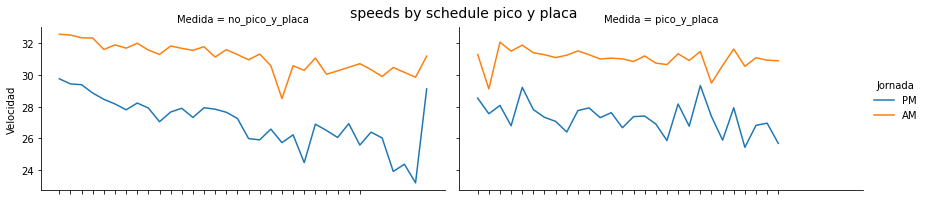

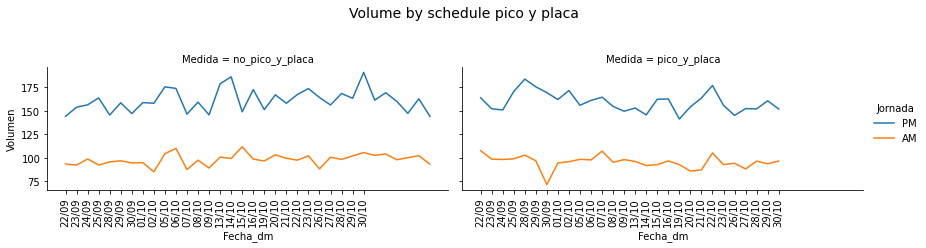

In [ ]:
g1 = sns.relplot(x="Fecha_dm", y="Velocidad", hue="Jornada",col="Medida", data=df,kind="line",col_wrap=2,
            height=3, aspect=2,ci=None)
g1.set(xlabel=None, xticklabels=[])

g2 = sns.relplot(x="Fecha_dm", y="Volumen", hue="Jornada",col="Medida", data=df,kind="line", col_wrap=2,
            height=3, aspect=2,ci=None)


#g2.set(title="Volume by peak schedule and plate")
g2.set_xticklabels(rotation=90)

plt.subplots_adjust(top=0.7)
g1.fig.suptitle('speeds by schedule pico y placa ', fontsize=14)
g2.fig.suptitle('Volume by schedule pico y placa ', fontsize=14)



Text(0.5, 0.98, 'Volume by schedule pico y placa ')

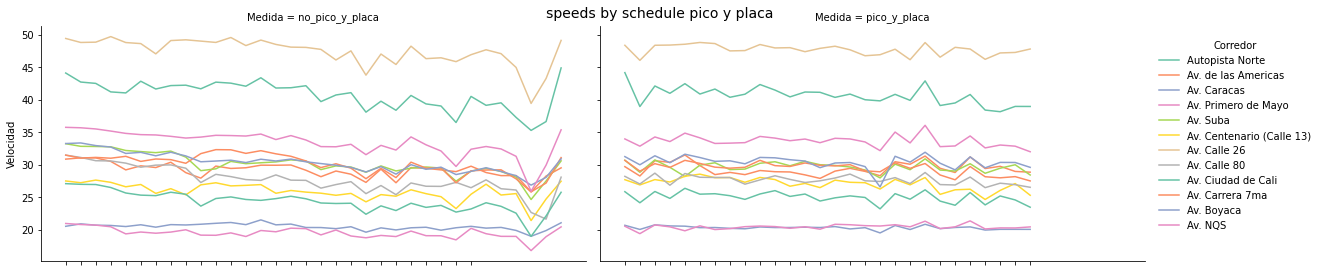

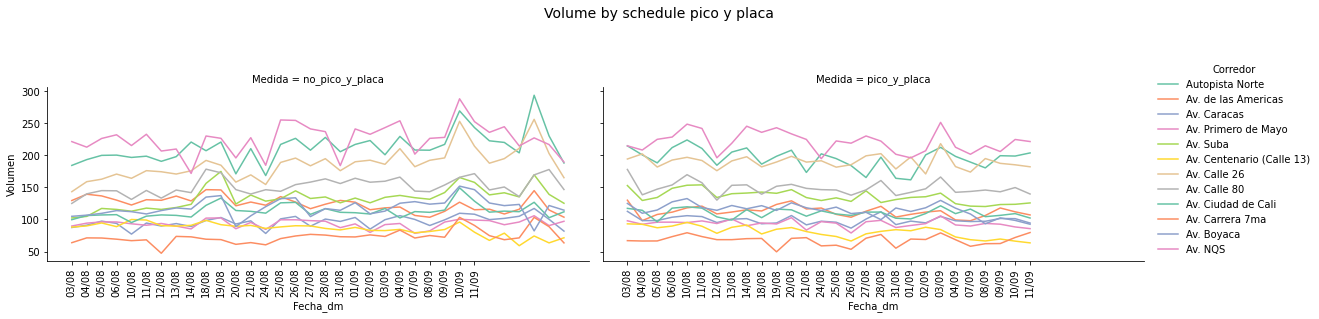

In [ ]:
g1 = sns.relplot(x="Fecha_dm", y="Velocidad", hue="Corredor",col="Medida", data=df,kind="line",col_wrap=2,
            height=4, aspect=2,ci=None, palette="Set2")
g1.set(xlabel=None, xticklabels=[])

g2 = sns.relplot(x="Fecha_dm", y="Volumen", hue="Corredor",col="Medida", data=df,kind="line", col_wrap=2,
            height=4, aspect=2,ci=None,palette="Set2")


#g2.set(title="Volume by peak schedule and plate")
g2.set_xticklabels(df_SPP.Fecha_dm.unique(), rotation=90)

plt.subplots_adjust(top=0.7)
g1.fig.suptitle('speeds by schedule pico y placa ', fontsize=14)
g2.fig.suptitle('Volume by schedule pico y placa ', fontsize=14)



Text(0.5, 0.98, 'Volume by schedule pico y placa ')

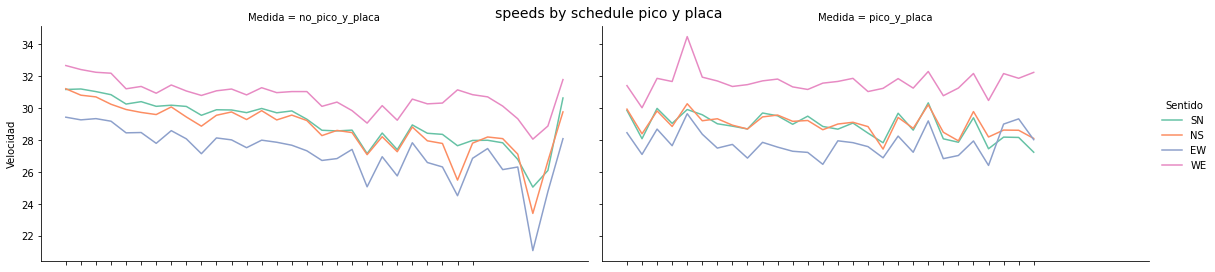

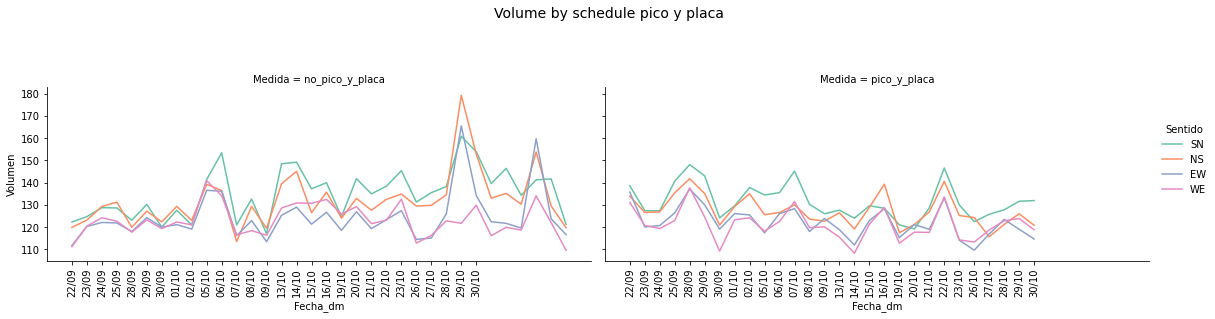

In [ ]:
g1 = sns.relplot(x="Fecha_dm", y="Velocidad", hue="Sentido",col="Medida", data=df,kind="line",col_wrap=2,
            height=4, aspect=2,ci=None, palette="Set2")
g1.set(xlabel=None, xticklabels=[])

g2 = sns.relplot(x="Fecha_dm", y="Volumen", hue="Sentido",col="Medida", data=df,kind="line", col_wrap=2,
            height=4, aspect=2,ci=None,palette="Set2")


#g2.set(title="Volume by peak schedule and plate")
g2.set_xticklabels(rotation=90)

plt.subplots_adjust(top=0.7)
g1.fig.suptitle('speeds by schedule pico y placa ', fontsize=14)
g2.fig.suptitle('Volume by schedule pico y placa ', fontsize=14)



In [ ]:
# fig, ax=plt.subplots(2,2, figsize=(20,8))
# g1 = sns.boxplot(y='Velocidad',  x="Sentido", data = df2[df2["Jornada"]=="AM"], showfliers=False,  color="Skyblue", ax=ax[0,0])
# g2 = sns.boxplot(y='Velocidad',  x="Sentido", data = df2[df2["Jornada"]=="PM"], showfliers=False,  color="Skyblue", ax=ax[0,1]) 


# g3 = sns.boxplot(y='Volumen',  x="Sentido", data = df2[df2["Jornada"]=="AM"], showfliers=False,  color="Skyblue", ax=ax[1,0])
# g4 = sns.boxplot(y='Volumen',  x="Sentido", data = df2[df2["Jornada"]=="PM"], showfliers=False,  color="Skyblue", ax=ax[1,1]) 

# g1.set_xticklabels(g1.get_xticklabels(), rotation = 60)
# g2.set_xticklabels(g2.get_xticklabels(), rotation = 60)

# g3.set_xticklabels(g3.get_xticklabels(), rotation = 60)
# g4.set_xticklabels(g4.get_xticklabels(), rotation = 60)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


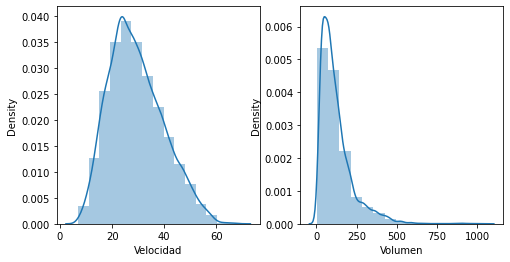

In [ ]:
fig, ax=plt.subplots(1,2, figsize=(8,4))
sns.distplot(df2.Velocidad, bins = 15, ax=ax[0] )
sns.distplot(df2.Volumen, bins = 15, ax=ax[1]) 

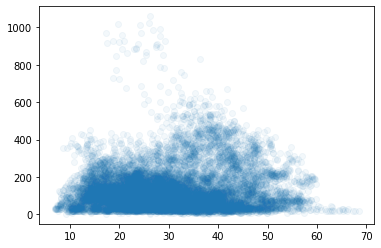

In [ ]:
plt.scatter(df2.Velocidad, df2.Volumen, alpha=0.05, edgecolor=None)

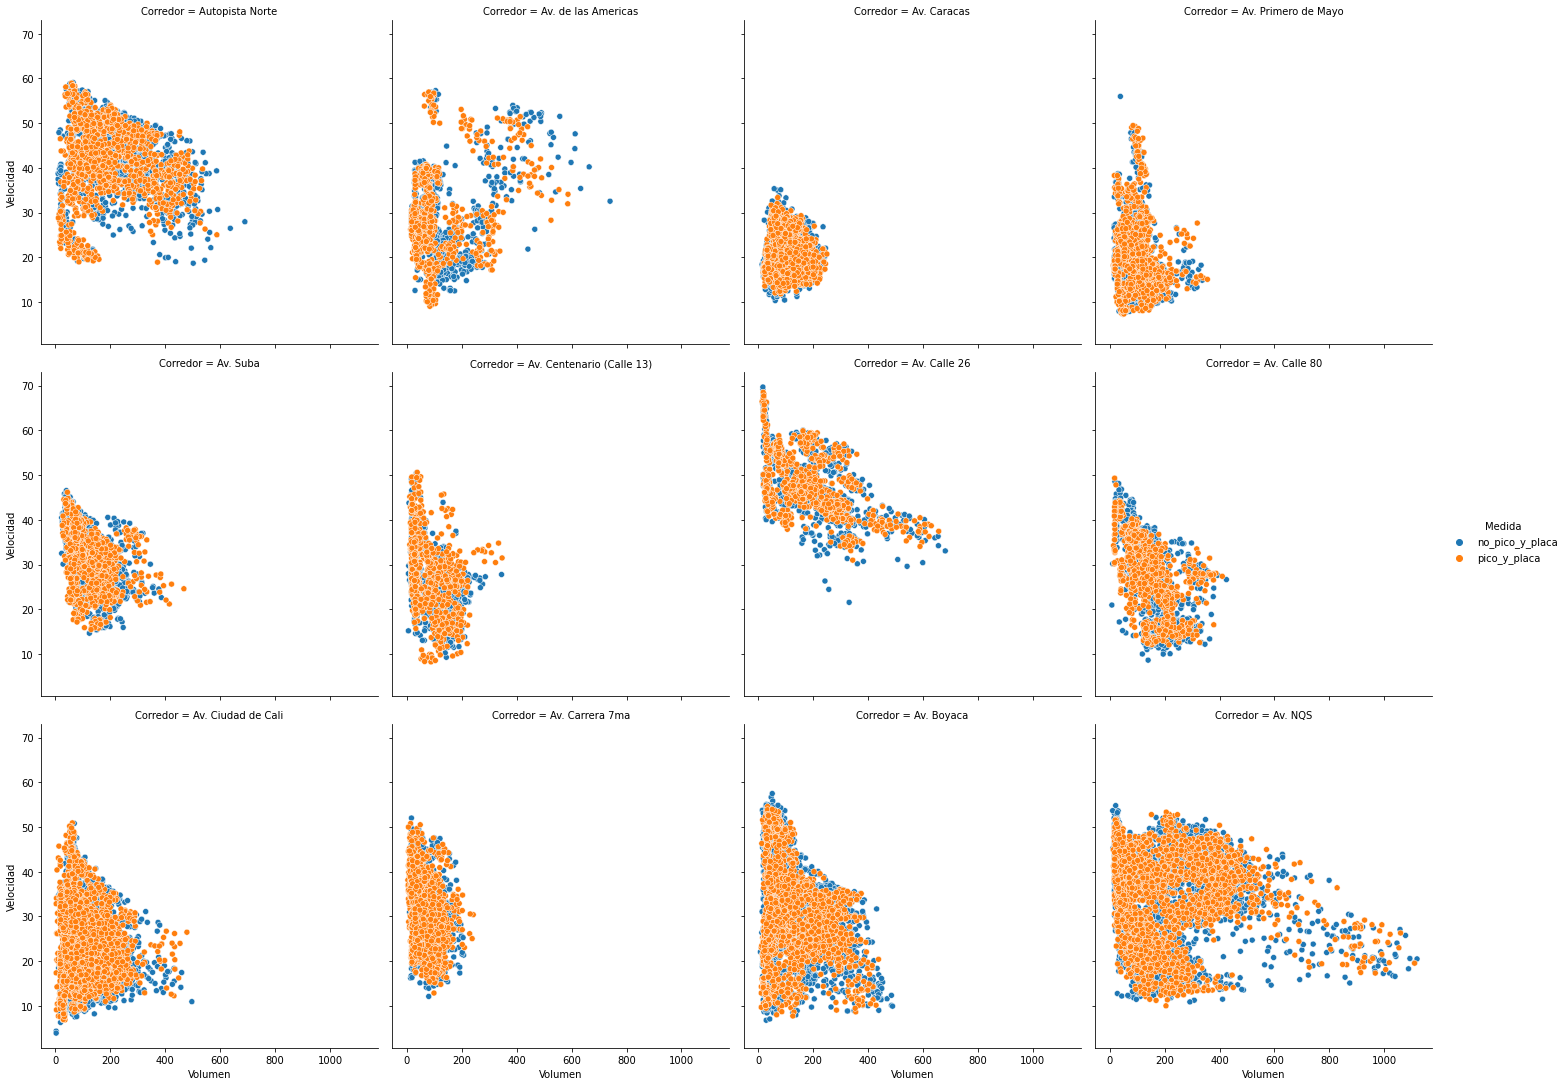

In [ ]:
sns.relplot(x="Volumen", y="Velocidad", col="Corredor",hue="Medida", data=df,col_wrap=4)

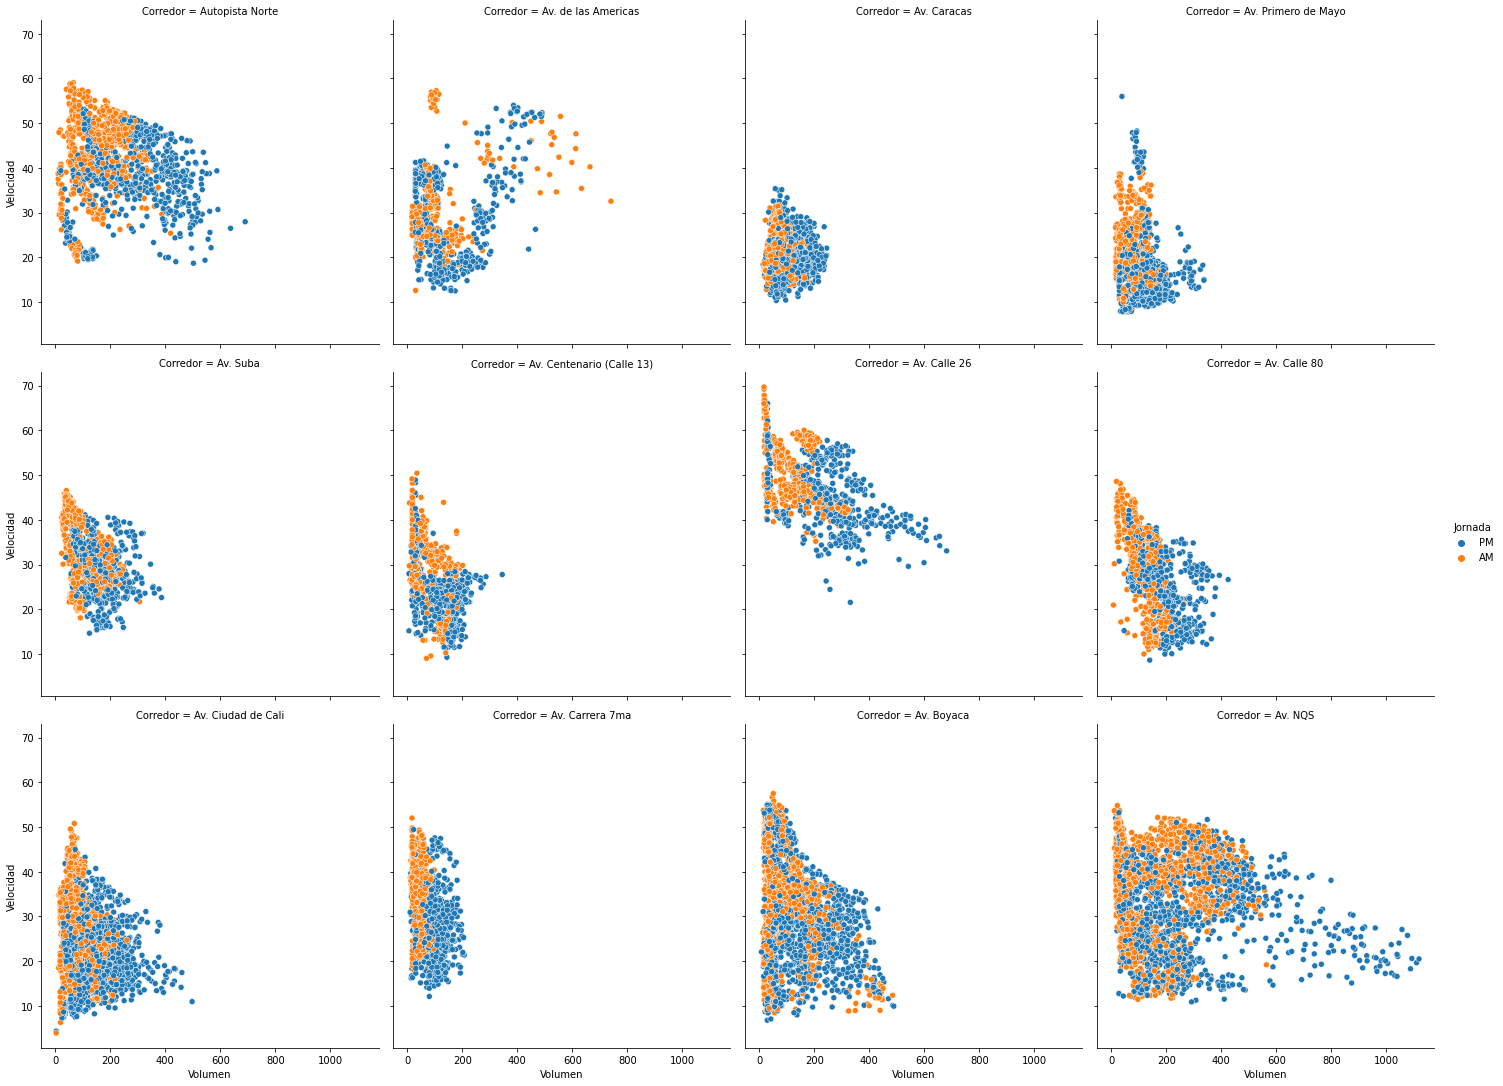

In [ ]:
sns.relplot(x="Volumen", y="Velocidad", col="Corredor",hue="Jornada", data=df_SPP,col_wrap=4)

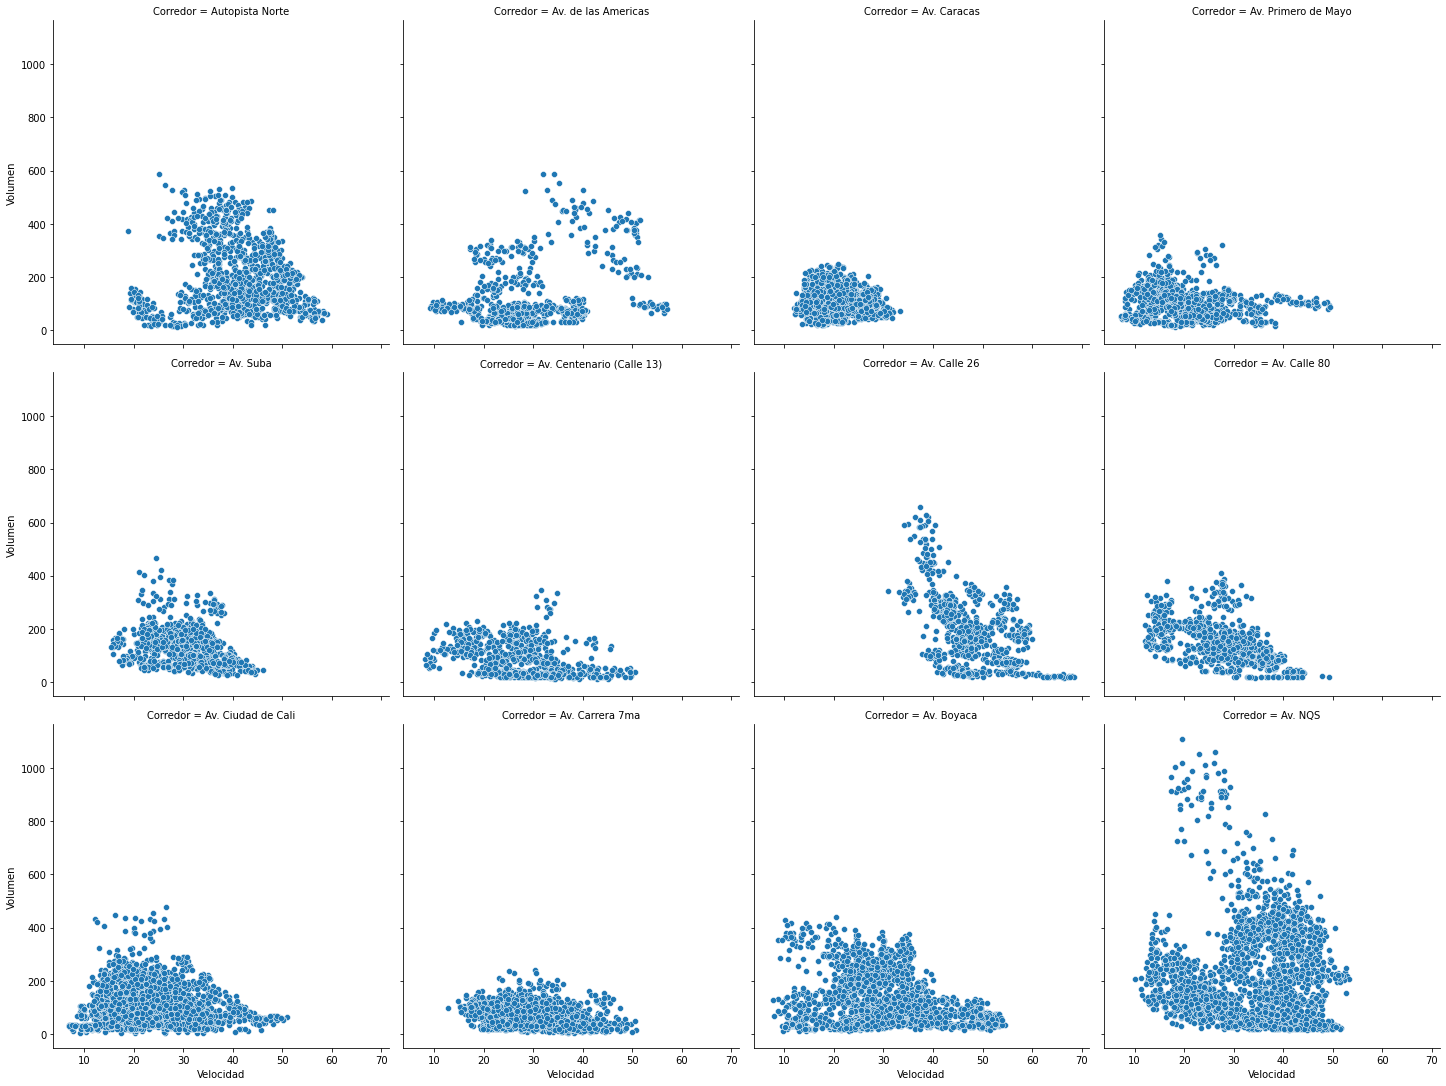

In [ ]:
sns.relplot(x="Velocidad", y="Volumen", col="Corredor", data=df_PP,col_wrap=4)
